In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import re

import warnings
warnings.filterwarnings("ignore")

In [100]:
df = pd.read_csv('bank-additional-full.csv', sep=';' )
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes



    bank client attributes:
        age: age of client (numeric)
        job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")
        marital : marital status (categorical: "married", "divorced", "single")
        education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")

    historical bank data
        default: has credit in default? (binary/2-categories: "yes", "no")
        housing: has housing loan? (binary/2-categories: "yes", "no")
        loan: has personal loan? (binary/2-categories: "yes", "no")

    information of the current campaign:
        contact: contact communication type (categorical: "unknown", "telephone", "cellular")
        month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
        duration: last contact duration, in seconds (numeric)

    information of the last campain:
        campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
        pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
        previous: number of contacts performed before this campaign and for this client (numeric)
        poutcome: outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")

    social and economic context attributes
        emp.var.rate: employment variation rate — quarterly indicator (numeric)
        cons.price.idx: consumer price index — monthly indicator (numeric)
        cons.conf.idx: consumer confidence index — monthly indicator (numeric)
        euribor3m: euribor 3 month rate — daily indicator (numeric)
        nr.employed: number of employees — quarterly indicator (numeric

    Output variable (desired target):
        y: has the client subscribed a term deposit? (binary: "yes", "no")


In [101]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [102]:
df.replace(to_replace= 'unknown', value= np.nan, inplace= True)

In [103]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [104]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in df.columns.to_list() if x not in categorical]
numerical.remove('y')

<AxesSubplot:xlabel='y', ylabel='count'>

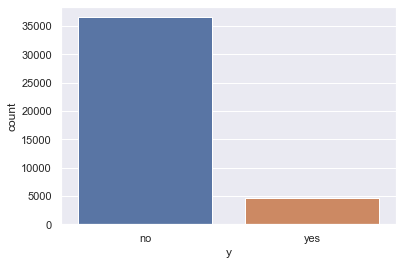

In [105]:
sns.countplot(df['y'])
# imbalance data

In [106]:
def output_encode(x):
    if x == 'yes':
        return 1
    elif x == 'no':
        return 0

df['y'] = df['y'].apply(output_encode)
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [107]:
# bank client attributes:

[Text(0.5, 1.0, 'Subscribed')]

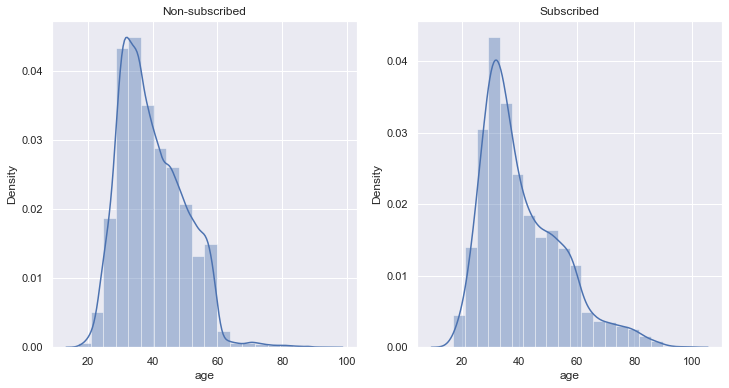

In [108]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.distplot(df[df['y'] == 0]['age'], ax= ax[0], bins= 20).set(title = "Non-subscribed")
sns.distplot(df[df['y'] == 1]['age'], ax= ax[1], bins= 20).set(title = "Subscribed")
# người già có xu hướng subscribe dịch vụ hơn

[Text(0, 0, 'housemaid'),
 Text(1, 0, 'services'),
 Text(2, 0, 'admin.'),
 Text(3, 0, 'blue-collar'),
 Text(4, 0, 'technician'),
 Text(5, 0, 'retired'),
 Text(6, 0, 'management'),
 Text(7, 0, 'unemployed'),
 Text(8, 0, 'self-employed'),
 Text(9, 0, 'entrepreneur'),
 Text(10, 0, 'student')]

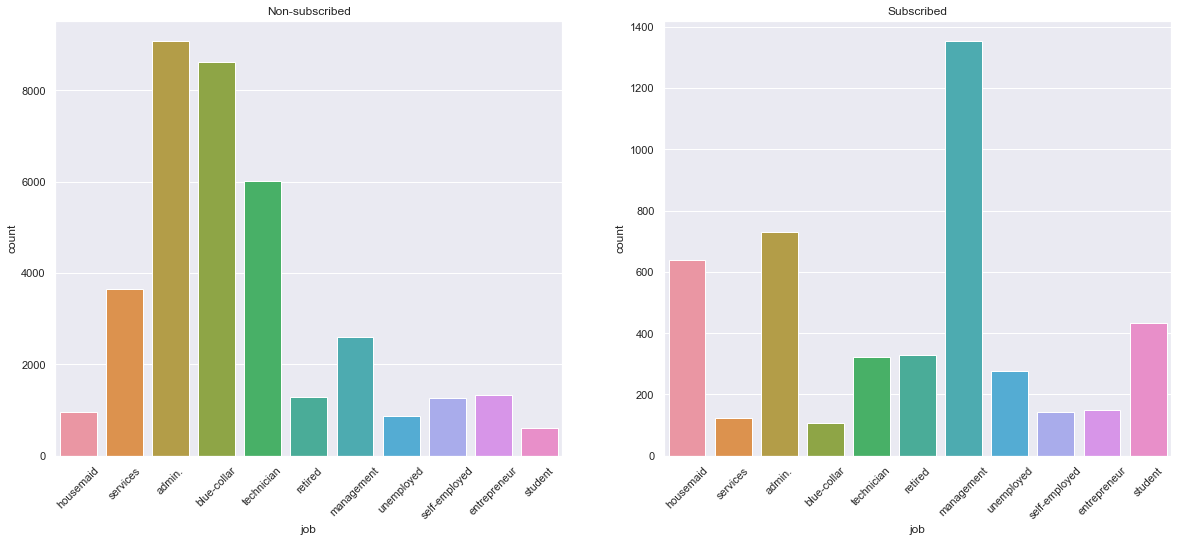

In [109]:
fig, ax = plt.subplots(1, 2, figsize= (20,8))
sns.countplot(df[df['y'] == 0]['job'], ax= ax[0]).set(title = "Non-subscribed")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)
sns.countplot(df[df['y'] == 1]['job'], ax= ax[1]).set(title = "Subscribed")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)
# những người có nghề nghiệp có nhiều thời gian rảnh hoặc thất nghiệp thường subscribe nhưng dịch vụ nhiều hơn
# trong khi đó công nhân hoặc những người làm việc technican thường không sue dụng các loại dịc vụ này

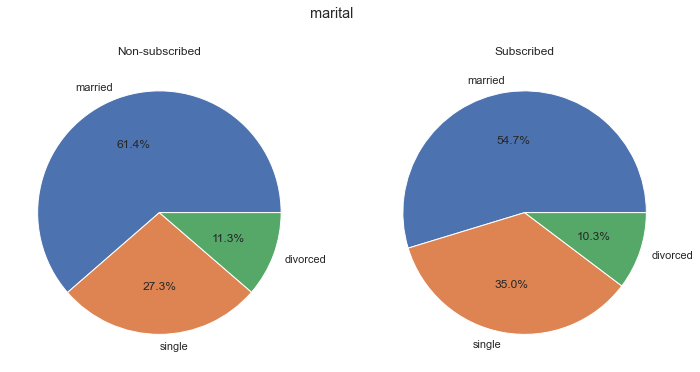

In [110]:
def categories_pie_plot(df, x, y):
    fig, ax = plt.subplots(1,2, figsize= (12,6))
    fig.suptitle(x)
    x1 = df[df[y] == 0][x].value_counts(normalize= True).sort_values(ascending= False)
    ax[0].pie(x1, labels= x1.index, autopct='%1.1f%%')
    ax[0].title.set_text("Non-subscribed")

    x2 = df[df[y] == 1][x].value_counts(normalize= True).sort_values(ascending= False)
    ax[1].pie(x2, labels=x2.index, autopct='%1.1f%%')
    ax[1].title.set_text("Subscribed")

categories_pie_plot(df, 'marital', 'y')

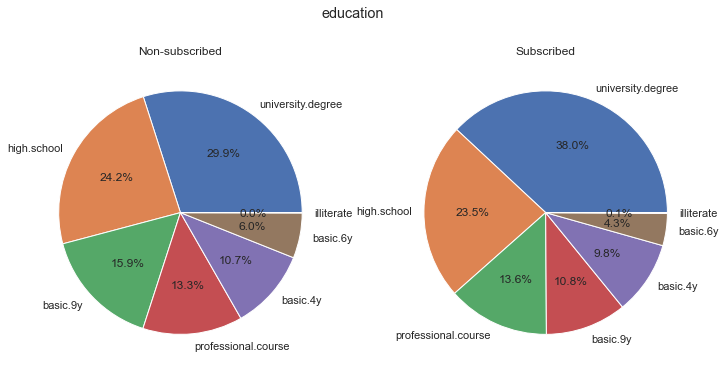

In [111]:
categories_pie_plot(df, 'education', 'y')
# university degree có xu hướng

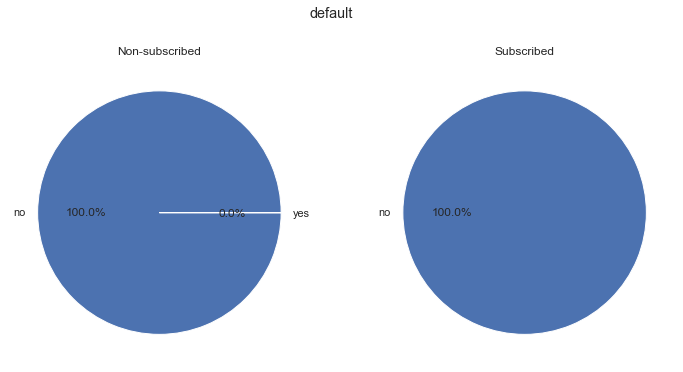

In [112]:
categories_pie_plot(df, 'default', 'y')
# những khách hàng đang mang nợ thường không có  nhu cầu subscribe dịch vụ

[Text(0, 0, 'may'),
 Text(1, 0, 'jun'),
 Text(2, 0, 'jul'),
 Text(3, 0, 'aug'),
 Text(4, 0, 'oct'),
 Text(5, 0, 'nov'),
 Text(6, 0, 'dec'),
 Text(7, 0, 'mar'),
 Text(8, 0, 'apr'),
 Text(9, 0, 'sep')]

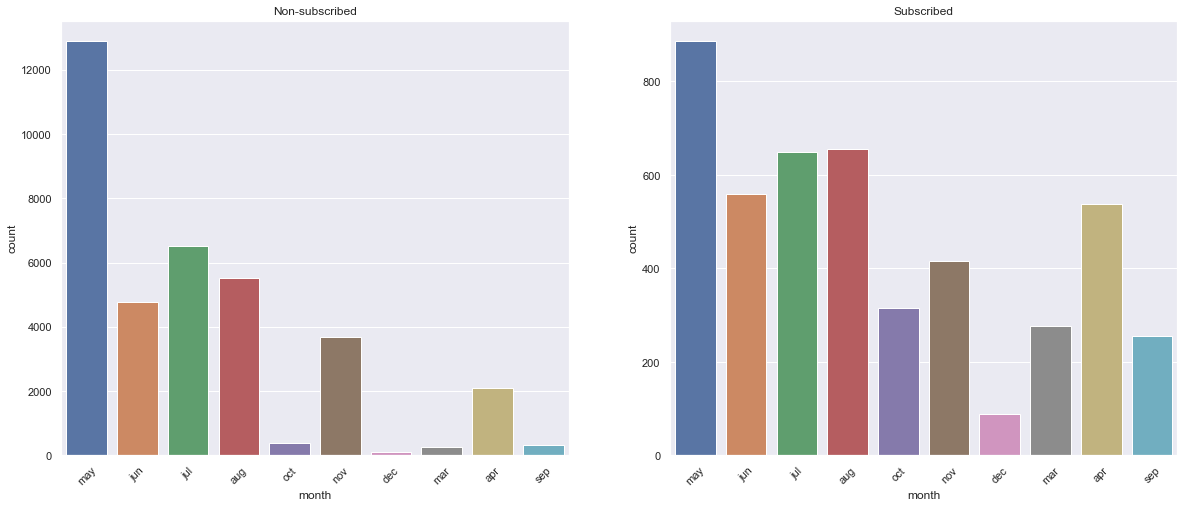

In [113]:
fig, ax = plt.subplots(1, 2, figsize= (20,8))
sns.countplot(df[df['y'] == 0]['month'], ax= ax[0]).set(title = "Non-subscribed")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)
sns.countplot(df[df['y'] == 1]['month'], ax= ax[1]).set(title = "Subscribed")
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation= 45)

[Text(0.5, 1.0, 'Subscribed')]

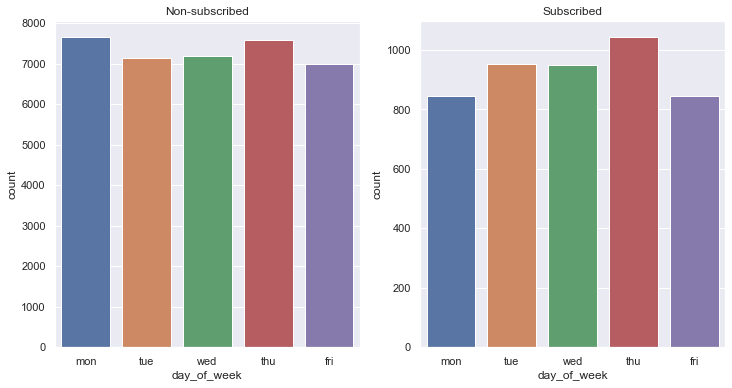

In [114]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.countplot(df[df['y'] == 0]['day_of_week'], ax= ax[0]).set(title = "Non-subscribed")
sns.countplot(df[df['y'] == 1]['day_of_week'], ax= ax[1]).set(title = "Subscribed")
# Thứ Hai đầu tuần và thứ Sáu cuối tuần khách hàng có xu hướng bỏ qua các quảng cáo mà tập trung vào các dịch vụ chính hơn

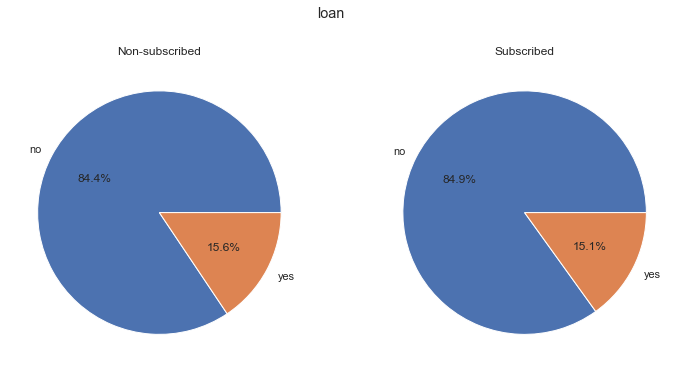

In [115]:
categories_pie_plot(df, 'loan', 'y')

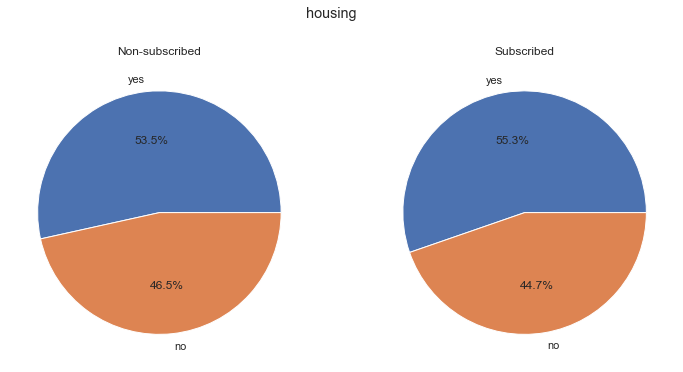

In [116]:
categories_pie_plot(df, 'housing', 'y')

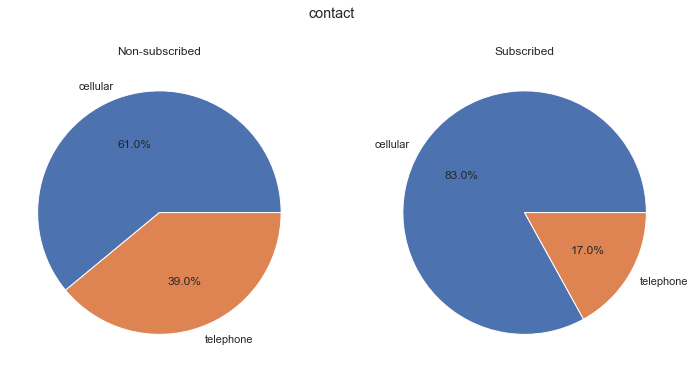

In [117]:
categories_pie_plot(df, 'contact', 'y')

[Text(0.5, 1.0, 'Subscribed')]

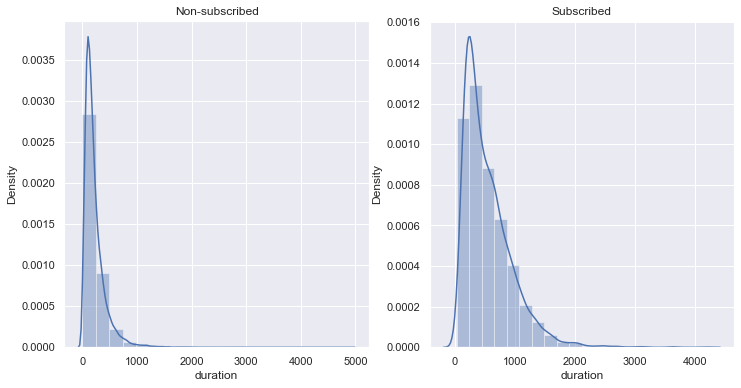

In [118]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.distplot(df[df['y'] == 0]['duration'], ax= ax[0], bins= 20).set(title = "Non-subscribed")
sns.distplot(df[df['y'] == 1]['duration'], ax= ax[1], bins= 20).set(title = "Subscribed")
# những người subscribe dịch vụ thường là những khách hàng có các khoản vay dài hạn

[Text(0.5, 1.0, 'Subscribed')]

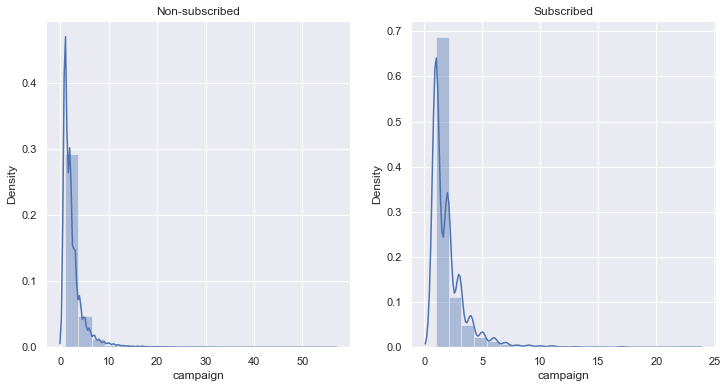

In [119]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.distplot(df[df['y'] == 0]['campaign'], ax= ax[0], bins= 20).set(title = "Non-subscribed")
sns.distplot(df[df['y'] == 1]['campaign'], ax= ax[1], bins= 20).set(title = "Subscribed")

In [120]:
df.groupby(['campaign'])['y'].value_counts(normalize= True)

campaign  y
1         0    0.869629
          1    0.130371
2         0    0.885430
          1    0.114570
3         0    0.892529
          1    0.107471
4         0    0.906073
          1    0.093927
5         0    0.924953
          1    0.075047
6         0    0.923391
          1    0.076609
7         0    0.939587
          1    0.060413
8         0    0.957500
          1    0.042500
9         0    0.939929
          1    0.060071
10        0    0.946667
          1    0.053333
11        0    0.932203
          1    0.067797
12        0    0.976000
          1    0.024000
13        0    0.956522
          1    0.043478
14        0    0.985507
          1    0.014493
15        0    0.960784
          1    0.039216
16        0    1.000000
17        0    0.931034
          1    0.068966
18        0    1.000000
19        0    1.000000
20        0    1.000000
21        0    1.000000
22        0    1.000000
23        0    0.937500
          1    0.062500
24        0    1.000000
25  

In [121]:
df.groupby(['pdays'])['y'].value_counts(normalize= True)
# tỉ lệ khách hàng sẽ từ chối subscribe dịch vụ tăng cao khách hàng là khách hàng bị bỏ quên
# tỉ lệ subscribe dịch vụ cao khi khách hàng là người đã sử dụng bất cứ dịch vụ tại bank trong 30 ngày gần nhất

pdays  y
0      1    0.666667
       0    0.333333
1      0    0.692308
       1    0.307692
2      1    0.606557
       0    0.393443
3      1    0.678815
       0    0.321185
4      1    0.533898
       0    0.466102
5      1    0.630435
       0    0.369565
6      1    0.701456
       0    0.298544
7      1    0.666667
       0    0.333333
8      1    0.666667
       0    0.333333
9      1    0.546875
       0    0.453125
10     1    0.576923
       0    0.423077
11     1    0.535714
       0    0.464286
12     0    0.551724
       1    0.448276
13     1    0.777778
       0    0.222222
14     1    0.550000
       0    0.450000
15     1    0.666667
       0    0.333333
16     1    0.545455
       0    0.454545
17     0    0.750000
       1    0.250000
18     1    0.571429
       0    0.428571
19     0    0.666667
       1    0.333333
20     0    1.000000
21     1    1.000000
22     1    0.666667
       0    0.333333
25     1    1.000000
26     1    1.000000
27     1    1.000000
999 

[Text(0.5, 1.0, 'Subscribed')]

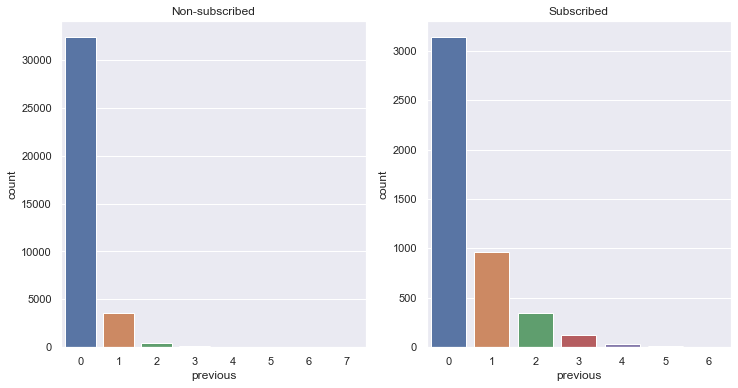

In [122]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.countplot(df[df['y'] == 0]['previous'], ax= ax[0]).set(title = "Non-subscribed")
sns.countplot(df[df['y'] == 1]['previous'], ax= ax[1]).set(title = "Subscribed")

In [123]:
df.groupby(['previous'])['y'].value_counts(normalize= True)
# những khách hàng có nhiều contract thì sẽ hứng thú với các dịch vụ subscribe hơn

previous  y
0         0    0.911678
          1    0.088322
1         0    0.787985
          1    0.212015
2         0    0.535809
          1    0.464191
3         1    0.592593
          0    0.407407
4         1    0.542857
          0    0.457143
5         1    0.722222
          0    0.277778
6         1    0.600000
          0    0.400000
7         0    1.000000
Name: y, dtype: float64

[Text(0.5, 1.0, 'Subscribed')]

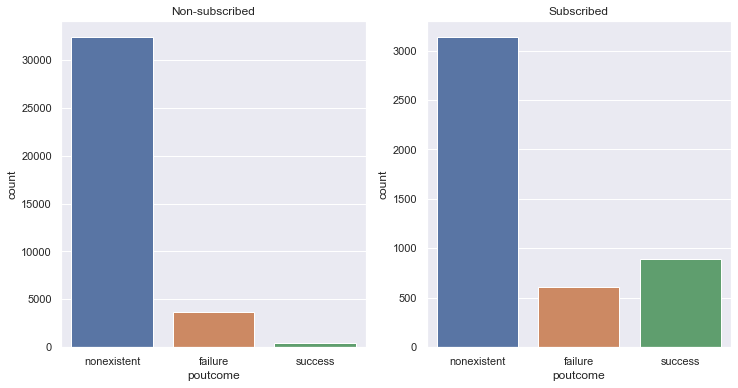

In [124]:
fig, ax = plt.subplots(1, 2, figsize= (12,6))
sns.countplot(df[df['y'] == 0]['poutcome'], ax= ax[0]).set(title = "Non-subscribed")
sns.countplot(df[df['y'] == 1]['poutcome'], ax= ax[1]).set(title = "Subscribed")
# những người có quá khứ đã từng subscribe 1 dịch vụ nào đó sẽ có xu hướng sử dụng các dịch vụ tiếp theo

In [125]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [126]:
df.groupby(['month', 'emp.var.rate'])['emp.var.rate'].count()

month  emp.var.rate
apr    -1.8            2632
aug    -2.9             770
       -1.7             233
        1.4            5175
dec    -3.0             172
       -0.2              10
jul    -2.9             178
       -1.7             311
        1.4            6685
jun    -2.9             715
       -1.7             229
        1.4            4374
mar    -1.8             546
may    -1.8            6006
        1.1            7763
nov    -3.4             357
       -1.1             128
       -0.1            3616
oct    -3.4             447
       -1.1             204
       -0.1              67
sep    -3.4             267
       -1.1             303
Name: emp.var.rate, dtype: int64

In [127]:
df['cons.price.idx'].value_counts(normalize= True)

93.994    0.188477
93.918    0.162305
92.893    0.140672
93.444    0.125643
94.465    0.106196
93.200    0.087793
93.075    0.059678
92.201    0.018695
92.963    0.017359
92.431    0.010853
92.649    0.008668
94.215    0.007551
94.199    0.007357
92.843    0.006847
92.379    0.006482
93.369    0.006410
94.027    0.005657
94.055    0.005560
93.876    0.005147
94.601    0.004953
92.469    0.004322
93.749    0.004225
92.713    0.004176
94.767    0.003108
93.798    0.001627
92.756    0.000243
Name: cons.price.idx, dtype: float64

In [128]:
df['cons.conf.idx'].value_counts(normalize= True)

-36.4    0.188477
-42.7    0.162305
-46.2    0.140672
-36.1    0.125643
-41.8    0.106196
-42.0    0.087793
-47.1    0.059678
-31.4    0.018695
-40.8    0.017359
-26.9    0.010853
-30.1    0.008668
-40.3    0.007551
-37.5    0.007357
-50.0    0.006847
-29.8    0.006482
-34.8    0.006410
-38.3    0.005657
-39.8    0.005560
-40.0    0.005147
-49.5    0.004953
-33.6    0.004322
-34.6    0.004225
-33.0    0.004176
-50.8    0.003108
-40.4    0.001627
-45.9    0.000243
Name: cons.conf.idx, dtype: float64

In [129]:
df['euribor3m'].value_counts(normalize= True)

4.857    0.069632
4.962    0.063441
4.963    0.060382
4.961    0.046178
4.856    0.029377
           ...   
3.853    0.000024
3.901    0.000024
0.969    0.000024
0.956    0.000024
3.669    0.000024
Name: euribor3m, Length: 316, dtype: float64

In [130]:
df['nr.employed'].value_counts(normalize= True)

5228.1    0.394144
5099.1    0.207196
5191.0    0.188477
5195.8    0.089419
5076.2    0.040376
5017.5    0.026003
4991.6    0.018768
5008.7    0.015781
4963.6    0.015417
5023.5    0.004176
5176.3    0.000243
Name: nr.employed, dtype: float64

In [136]:
# conversion rate
df[df['y'] == 1].shape[0] / df.shape[0] * 100

11.265417111780131

In [155]:
# conversion rate of each group
conversion_rate = df[df['y'] == 1].groupby(['age'])['y'].count() / df.groupby(['age'])['y'].count() * 100
conversion_rate.fillna(0, inplace= True)
conversion_rate

age
17     40.000000
18     42.857143
19     47.619048
20     35.384615
21     28.431373
         ...    
91      0.000000
92     75.000000
94      0.000000
95      0.000000
98    100.000000
Name: y, Length: 78, dtype: float64

<AxesSubplot:xlabel='age'>

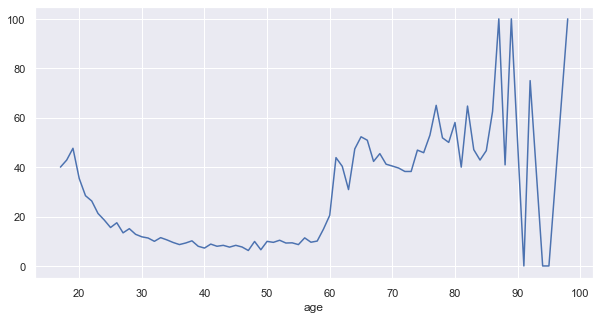

In [156]:
conversion_rate.plot(kind= 'line', figsize= [10,5])

In [157]:
df['age_range'] = pd.cut(df['age'], bins=[0, 17, 24, 40, 60, 100])
df['age_range'].value_counts()

(24, 40]     22700
(40, 60]     16510
(17, 24]      1063
(60, 100]      910
(0, 17]          5
Name: age_range, dtype: int64

In [158]:
conversion_rate_age_range = df[df['y'] == 1].groupby(['age_range'])['y'].count() / df.groupby(['age_range'])['y'].count() * 100
conversion_rate_age_range

age_range
(0, 17]      40.000000
(17, 24]     23.894638
(24, 40]     10.859031
(40, 60]      9.115687
(60, 100]    45.494505
Name: y, dtype: float64

In [176]:
df.pivot_table(df, values='y', index='marital', columns= 'conversion', aggfunc=len)

TypeError: pivot_table() got multiple values for argument 'values'

In [177]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [183]:
def get_stacked_bar_chart(feature,target):
    conversion_by_maritalstatus = pd.pivot_table(df,values=target,index=feature ,columns='y',aggfunc=len)
    ax = conversion_by_maritalstatus.div(conversion_by_maritalstatus.sum(axis=1),axis=9).plot(kind='barhi',stacked=True,figsize=[8,5])
    ax.get_legend().remove()###aremove the Legend. We con you aLso ox.get_Legende.set_visibte(FoLse)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.1%}'.format(width),(x+0.035,y+0.05))


In [184]:
get_stacked_bar_chart('contact','y')

ValueError: Grouper for 'y' not 1-dimensional

In [ ]:
df['campaign_T'] =

In [186]:
df1 = df['campaign'].value_counts()
df1

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [189]:
df1.iloc[6:].sum()

2406

In [194]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64